# ESAA 팀 과제 
# 2019년 11월 1일 
### 김지원, 박보정, 유찬미, 예지혜

### [통합 주제] 영국.미국.캐나다의 자료를 모두 통합하여 조회수로 정렬한 뒤, 어떤 나라가 가장 조회수가 많은지 알아보겠다.

In [18]:
import pandas as pd
us = pd.read_csv('USvideos.csv')
ca = pd.read_csv('CAvideos.csv')
gb = pd.read_csv('GBvideos.csv')

country 변수 추가하기

In [19]:
us["country"] = "US"
ca["country"] = "CA"
gb["country"] = "GB"

2) merge실행

In [20]:
list(us)==list(ca)
list(us)==list(us)

True

In [21]:
youtube_merge = pd.concat([ca,us,gb])
print(youtube_merge.shape)

(120746, 17)


3) 조회수로 sort

4) 100위까지 자르기.

In [22]:
youtube_sort = youtube_merge.sort_values(["views"], ascending=[False])
youtube_sort=youtube_sort.reset_index(drop=True)

In [23]:
youtube_100 = youtube_sort.iloc[0:100, ]

5) 나라별로 갯수세기

In [24]:
youtube_100["country"].value_counts()

GB    93
US     7
Name: country, dtype: int64

In [25]:
youtube_100["country"].head()

0    GB
1    GB
2    GB
3    GB
4    GB
Name: country, dtype: object

2-1) 그래프 그리기

In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

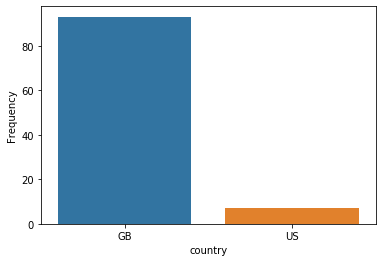

In [27]:
country_bar = plt.subplots() 
country_bar = sns.countplot('country', data=youtube_100)  
country_bar.set_xlabel('country') 
country_bar.set_ylabel('Frequency')

조회수 100위로 잘라 막대그래프를 보니, 영국이 가장 많은 것을 확인할 수 있다.
추가) 나열해보니, 겹치는 영상이 많은 것을 알 수 있었다. 임의로 비디오 아이디가 중복되는 행은 지우고 다시 그래프를 그려서 알아보고자 한다.

In [28]:
youtube_sort['video_id'].duplicated() 
#중복영상들 확인 (TRUE값이 중복값 있다는 것 의미.)

0         False
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9         False
10        False
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24        False
25         True
26         True
27         True
28         True
29         True
          ...  
120716     True
120717     True
120718     True
120719     True
120720     True
120721     True
120722     True
120723     True
120724     True
120725     True
120726    False
120727     True
120728     True
120729     True
120730    False
120731     True
120732     True
120733     True
120734     True
120735    False
120736    False
120737    False
120738     True
120739     True
120740    False
120741     True
120742     True
120743    False
120744     True
120745     True
Name: video_id, Length: 

중복된 데이터 지우고 확인. 인덱스를 보니 중복된 값이 없어진 것을 알 수 있음.

In [29]:
youtube_drop = youtube_sort.drop_duplicates('video_id') 
youtube_drop.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,_I_D_8Z4sJE,18.07.04,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,10,2018-03-02T05:00:19.000Z,"Bad Bunny|""Amorfoda""|""Dura""|""Daddy Yankee""|""Oz...",424538912,2818771,149275,99380,https://i.ytimg.com/vi/_I_D_8Z4sJE/default.jpg,False,False,False,Disponible en tu plataforma preferida:\nhttps:...,GB
9,9jI-z9QN6g8,18.18.05,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,10,2018-04-11T22:00:00.000Z,"Te Bote|""Te Bote Remix""|""Flow La Movie""|""Ozuna...",337621571,2581961,166549,113564,https://i.ytimg.com/vi/9jI-z9QN6g8/default.jpg,False,False,False,Flow La Movie Presenta - Te Boté Remix - Caspe...,GB
10,kLpH1nSLJSs,18.23.03,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,10,2018-02-15T00:00:03.000Z,"Bad|""Bunny""|""Bad Bunny""|""Video Oficial""|""Music...",328860380,3823879,215530,225216,https://i.ytimg.com/vi/kLpH1nSLJSs/default.jpg,False,False,False,Bad Bunny - Amorfoda | Video Oficial\n\n-Click...,GB
24,wfWkmURBNv8,18.01.03,Ozuna x Romeo Santos - El Farsante Remix,Ozuna,10,2018-01-30T15:00:05.000Z,"Ozuna|""Reggaeton""|""Odisea""|""Odisea The Album""|...",288811992,1618180,151147,67506,https://i.ytimg.com/vi/wfWkmURBNv8/default.jpg,False,False,False,DESCARGA Odisea Aqui: http://apple.co/2vX00sT\...,GB
38,VYOjWnS4cMY,18.11.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",259721696,5444541,379862,553371,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,GB


In [30]:
print(youtube_drop.shape)

(30318, 17)


중복 제거 전 (120746, 17) 였으나 제거 후에 30318행이 된 것을 확인할 수 있다.

우선 30318개의 자료로 먼저 나라별 그래프를 그려보겠다.

Text(0, 0.5, 'Frequency')

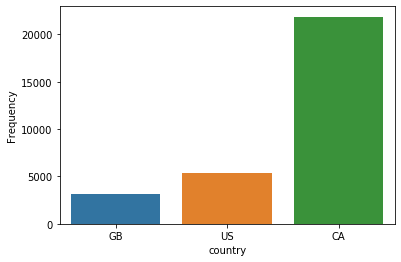

In [31]:
bar_total = plt.subplots() 
bar_total = sns.countplot('country', data=youtube_drop)  
bar_total.set_xlabel('country') 
bar_total.set_ylabel('Frequency')

조회수에 상관없이, 자료의 수는 캐나다가 월등히 많음을 알 수 있다.

Text(0, 0.5, 'Frequency')

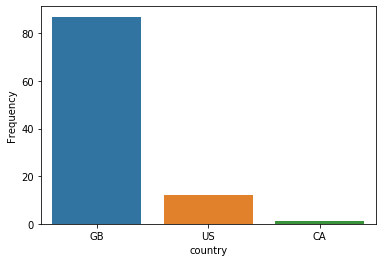

In [32]:
drop_100 = youtube_drop.iloc[0:100,]
bar1 = plt.subplots() 
bar1 = sns.countplot('country', data=drop_100)  
bar1.set_xlabel('country') 
bar1.set_ylabel('Frequency')

그러나 100위까지만 본다면, 여전히 영국이 우세하게 많음을 알 수 있다.

Text(0, 0.5, 'views')

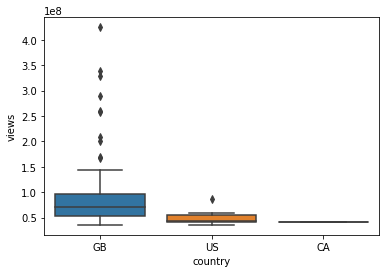

In [33]:
plot2 = plt.subplots() 
plot2 = sns.boxplot(x='country',y='views', data= drop_100)
plot2.set_xlabel('country') 
plot2.set_ylabel('views')

마지막으로 나라별 조회수의 분포 모양을 보기위해서 박스 그림을 그려보았다. 영국이 미국, 캐나다에 비해서 높은 조회수 쪽에 분포하고 있는 것을 알 수 있다.

### [1번 주제] 조회수 100위까지 자르고, 태그 수를 비교/어떤 태그가 많이 사용되었는지 알아보기

In [34]:
import pandas as pd
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
kr = pd.read_csv(input_fd)
kr100 = kr.sort_values('views', ascending=False).iloc[:100,:]

In [35]:
def string_handle(x): #문자열 처리 함수
    x = x.lower() #소문자로 변경
    x = x.replace('"','') #"제거
    x = x.replace('#','') ##제거
    x = x.replace('_', ' ') #_를 공백으로 변경
    x = x.strip() #양쪽 공백 제거
    return x

In [36]:
tag100 = []
for tags in kr100['tags']:
    tag_lst = tags.split('|')
    tag100.extend(tag_lst)
handled_tag100 = [string_handle(x) for x in tag100]
tag100_count=pd.DataFrame(data={'tag':handled_tag100}).groupby('tag').size().reset_index().rename(columns={0:'count'}).sort_values('count',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48709 missing from c

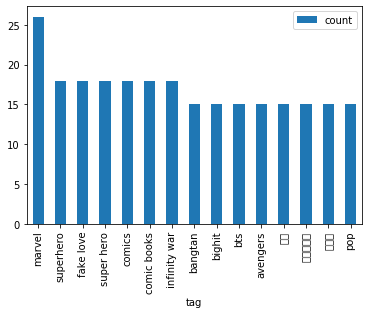

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
tag100_count.iloc[:15,:].set_index("tag").plot.bar(ax=ax)

In [38]:
kr100['tag_count'] = kr100['tags'].apply(lambda x:x.count('|')+1)

Text(0, 0.5, 'views')

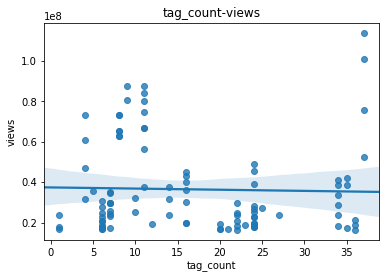

In [39]:
import seaborn as sns
ax = plt.subplots() 
ax = sns.regplot(x='tag_count', y='views', data=kr100) 
ax.set_title('tag_count-views') 
ax.set_xlabel('tag_count') 
ax.set_ylabel('views') 

### [2번 주제]

In [68]:
import pandas as pd
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KRvideos = pd.read_csv(input_fd)
print(KRvideos.head())

      video_id trending_date                       title channel_title  \
0  RxGQe4EeEpA      17.14.11          좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1  hH7wVE8OlQ0      17.14.11            JSA 귀순 북한군 총격 부상        Edward   
2  9V8bnWUmE9U      17.14.11  나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3  0_8py-t5R80      17.14.11  이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4  bk55RbxiQdI      17.14.11     김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   

   category_id              publish_time  \
0           22  2017-11-13T07:07:36.000Z   
1           25  2017-11-13T10:59:16.000Z   
2           22  2017-11-11T07:16:08.000Z   
3           25  2017-11-12T11:19:52.000Z   
4           25  2017-11-13T11:08:59.000Z   

                                                tags   views  likes  dislikes  \
0                      라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서"  156130   1422        40   
1        JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상"   76533    211        28   
2                아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"대학로"

In [69]:
input_fd = open('JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JPvideos = pd.read_csv(input_fd)
print(JPvideos.head())

      video_id trending_date                                      title  \
0  5ugKfHgsmYw      18.07.02                         陸自ヘリ、垂直に落下＝路上の車が撮影   
1  ohObafdd34Y      18.07.02                     イッテQ お祭り男宮川×手越 巨大ブランコ②   
2  aBr2kKAHN6M      18.07.02                      Live Views of Starman   
3  5wNnwChvmsQ      18.07.02                 東京ディズニーリゾートの元キャストが暴露した秘密5選   
4  B7J47qFvdsk      18.07.02  榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報   

          channel_title  category_id              publish_time  \
0            時事通信映像センター           25  2018-02-06T03:04:37.000Z   
1  神谷えりな Kamiya Erina 2            1  2018-02-06T04:01:56.000Z   
2                SpaceX           28  2018-02-06T21:38:22.000Z   
3               アシタノワダイ           25  2018-02-06T06:08:49.000Z   
4               シネマトゥデイ            1  2018-02-06T02:30:00.000Z   

                                                tags    views   likes  \
0  事故|"佐賀"|"佐賀県"|"ヘリコプター"|"ヘリ"|"自衛隊"|"墜落"|"落下"|"現...   188085     591   
1     

In [70]:
print(KRvideos['views'].sum())
print(KRvideos['views'].sum()/51709098/365)
print(JPvideos['views'].sum())
print(JPvideos['views'].sum()/126860301/365)

14689152313
0.7782818588776923
5377466630
0.11613392977580302


### [3번 주제] like 와 dislike (호감/비호감) 비율 구한 뒤, 어떤 카테고리인지 파악하기

In [81]:
# 패키지 불러오기
from pandas import *
import pandas as pd

# 현재 위치 확인 
import os 
os.getcwd() # 현재 디렉토리 위치 확인 

'C:\\Users\\Chanmi Yoo\\Desktop\\ESAA\\191101 ESAA 팀'

In [82]:
# 데이터 불러오기 
input_fd = open('KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KRvideos = pd.read_csv(input_fd)

In [83]:
# 카데고리 설명 json 파일 불러오기 
import json
from pprint import pprint

with open('KR_category_id.json') as data_file:    
    data = json.load(data_file)

In [84]:
# 카테고리 설명 데이터프레임 만들기 
ID = []
title = []

for i in range(len(data["items"])):
    ID.append(data["items"][i]["id"])
    title.append(data["items"][i]["snippet"]["title"])

category_desc = pd.DataFrame({'category_id':ID, 
                             'category': title})
category_desc

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [85]:
# 문자열 변환 
category_desc["category_id"] = category_desc["category_id"].apply(str)
KRvideos["category_id"] = KRvideos["category_id"].apply(str)

# 기존 KR 데이터프레임에 카테고리 설명 데이터프레임을 합친 뒤, KR에 저장하기 
KR = pd.merge(KRvideos, category_desc, on="category_id", how='left')

#### [좋아요(likes) 상위 25%의 카테고리 분포]

In [86]:
# 좋아요 내림차순으로 정렬 후 KR_likes에 저장 
KR_likes = KR.sort_values(by=['likes'], ascending=False)

# 좋아요 상위 25% 추출 후 KR_25에 저장 
KR_likes25 = KR_likes.iloc[1:round(len(KR_likes)*0.25)]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
30583,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
30352,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music
30486,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music


In [118]:
# 좋아요 상위 25%의 카테고리 분포 살펴보기 

Text(0.5, 1.0, 'Histogram of Top 25% Likes Videoes Catergories')

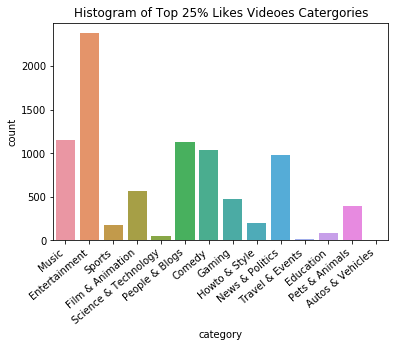

In [133]:
import seaborn as sns

bar1 = plt.subplots()
bar1 = sns.countplot('category', data=KR_likes25)
bar1.set_xticklabels(bar1.get_xticklabels(), rotation=40, ha='right')
bar1.set_title('Histogram of Top 25% Likes Videoes Catergories')

Text(0.5, 1.0, 'Histogram of Catergories')

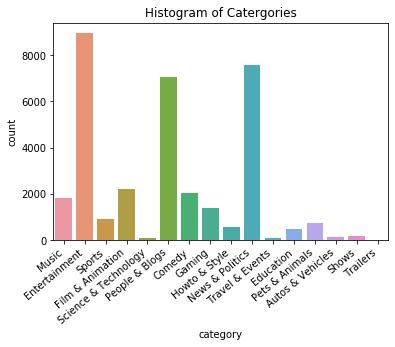

In [134]:
bar2 = sns.countplot('category', data=KR_likes)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation=40, ha='right')
bar2.set_title('Histogram of Catergories')

좋아요 수 상위 25%에 속하는 비디오를 살펴본 결과, Entertainment가 두드러지게 많았고, People&blogs, Comedy, News&Politics가 비슷한 수준으로 그 뒤를 이었다. 한편 전체 비디오를 대상으로 카테고리의 수를 살펴보면 Entertainment, People&blogs, News&Politics의 비디오 수가 많다는 것을 알 수 있다. 반면 Comdey는 업로드된 비디오 수에 비해 좋아요를 많이 받은 비디오가 많았다. 

#### [싫어요(dislikes) 상위 25%의 카테고리 분포]

In [125]:
# 같은 방식으로 싫어요 상위 25%의 카테고리 분포를 살펴보자

KR_dislikes = KR.sort_values(by=['dislikes'], axis=0, ascending=False)
KR_dislikes25 = KR_dislikes.iloc[1:round(len(KR_dislikes)*0.25)]

Text(0.5, 1.0, 'Histogram of Top 25% Dislikes Videoes Catergory')

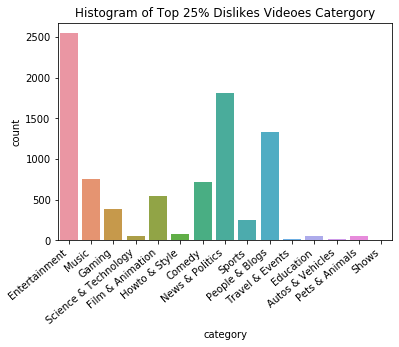

In [131]:
bar3 = plt.subplots()
bar3 = sns.countplot('category', data=KR_dislikes25)
bar3.set_xticklabels(bar3.get_xticklabels(), rotation=40, ha='right')
bar3.set_title('Histogram of Top 25% Dislikes Videoes Catergory')

Text(0.5, 1.0, 'Histogram of Catergory')

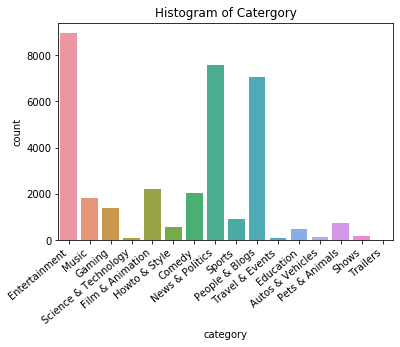

In [135]:
bar4 = sns.countplot('category', data=KR_dislikes)
bar4.set_xticklabels(bar4.get_xticklabels(), rotation=40, ha='right')
bar4.set_title('Histogram of Catergory')

싫어요 상위 25% 비디오의 카데고리는 Entertainment, News&Politics, People&Blogs였다. 이 카테고리는 업로드 자체가 많은 카테고리이다.  

In [160]:
# 중복 없이 상위 25% 좋아요와 싫어요 데이터 합치기 
total_25 = pd.concat([KR_likes25, KR_dislikes25]).drop_duplicates()
total_25.shape

(11339, 17)

Text(0.5, 0.98, 'Joint Scatterplot of # of Top 25% Likes and Top 25% Dislikes')

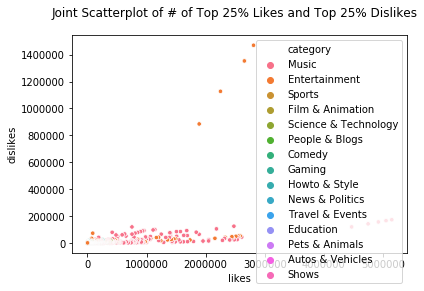

In [186]:
# 상위 25% 좋아요 혹은 싫어요의 Likes와 DIslikes의 관계 
sns.scatterplot(x='likes', y='dislikes', data=total_25,
               hue='category',  s=20)
plt.suptitle('Joint Scatterplot of # of Top 25% Likes and Top 25% Dislikes')

추가적으로 살펴보면 좋아요는 매우 많지만 싫어요는 적은 긍정반응 비디오, 좋아요도 싫어요도 받은 혼합반응 비디오 outlier가 있었다. outlier들의 카테고리는 entertainment, music이었다.

위의 그래프에서 나타난 outlier(likes는 4000000 이상, dislikes는 800000 이상)를 제거한 뒤 joint plot을 그려보겠다. 

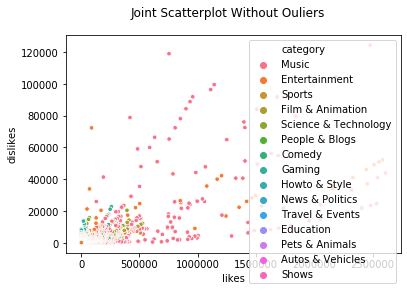

In [198]:
# Outlier 제거시 scatter plot
total_25_out = total_25[(total_25['likes']<4000000) & (total_25['dislikes']<800000)]

sns.scatterplot(x='likes', y='dislikes', data=total_25_out, 
                hue='category',  s=20)
plt.suptitle('Joint Scatterplot Without Ouliers')
plt.legend(loc='best')

music, shows, entertainment 카테고리가 극도로 좋아요 수나 싫어요 수가 많았다.

#### [결론] 한국에서 좋아요 많이 받고 싶다면 코미디 영상 올리는 것이 좋습니다.

### [4번 주제]

나라별 하루에 얼마나 많이 유튜브를 보는지 한국과 일본의 한 사람당 하루 평균 유튜브 시청 횟수를 살펴본 결과, 한국이 0.78회, 일본이 0.12회로 한국이 훨씬 높은 것으로 나타났다. 일본의 인구 수가 많은 점을 고려해, 하루 평균 전국의 유튜브 스트리밍 횟수를 비교해보아도, 한국이 146.9억회, 일본이 53.8억회로, 한국이 약 3배 가량 스트리밍 수가 많음을 알 수 있다.

In [71]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

1. 댓글수 100위까지 자르고, 태그 수 비교

In [72]:
kr_sort = KRvideos.sort_values('comment_count', ascending=False)
kr_drop = kr_sort.drop_duplicates('video_id')
kr100 = kr_drop.iloc[:100,:]

중복 제거

In [73]:
kr100.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
30844,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
4453,FlsCjmMhFmw,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",75969469,2251837,1127817,827771,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2788,kTlv5_Bs8aw,17.29.11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",30583293,2611254,43899,529881,https://i.ytimg.com/vi/kTlv5_Bs8aw/default.jpg,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...
28803,32sYGCOYJUM,18.13.05,CHẠY NGAY ĐI | RUN NOW | SƠN TÙNG M-TP | Offic...,Sơn Tùng M-TP Official,10,2018-05-11T17:00:47.000Z,"chạy ngay đi mv|""chạy ngay đi""|""chay ngay di m...",27470728,753626,118983,401470,https://i.ytimg.com/vi/32sYGCOYJUM/default.jpg,False,False,False,#ChayNgayDi #RunNow #เรียกใช้เดี๋ยวนี้ #MTPEnt...
17879,OK3GJ0WIQ8s,18.02.03,j-hope 'Daydream (백일몽)' MV,ibighit,10,2018-03-01T15:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",10695328,2050584,14714,387397,https://i.ytimg.com/vi/OK3GJ0WIQ8s/default.jpg,False,False,False,j-hope 'Daydream (백일몽)'\n\n\nj-hope's 'Daydrea...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


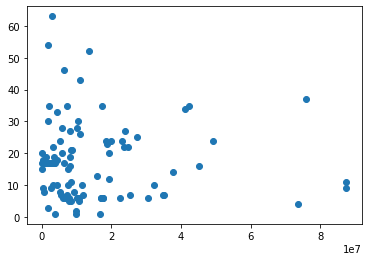

In [74]:
kr100['tag_count'] = kr100['tags'].apply(lambda x:x.count('|')+1)
kr100[['title','tags','views','comment_count','tag_count']]
plt.plot(kr100['views'], kr100['tag_count'], 'o')


댓글수 100위까지의 태그들과 태그 수를 살펴보면 어떠한 상관관계가 보이지는 않는다.

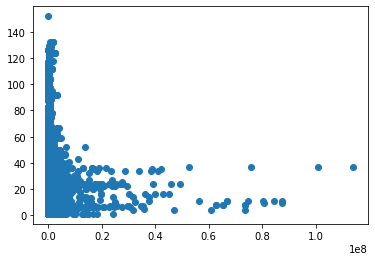

In [75]:
KRvideos['tag_count'] = KRvideos['tags'].apply(lambda x:x.count('|')+1)
plt.plot(KRvideos['views'], KRvideos['tag_count'], 'o')

전체 데이터를 활용해보면 오히려 반비례의 경향을 볼 수 있지만, 이는 조회수 낮은 영상의 수가 훨씬 많기 때문으로 보인다. 즉, 태그 수는 딱히 의미가 없다.

In [76]:
kr100['ranking_group']=sorted(list(range(0,10))*10)
print(kr100.groupby('ranking_group').views.mean())

ranking_group
0    41799010.5
1    25196789.6
2    21901024.2
3     7110687.7
4     8003506.4
5    11696713.8
6     8129913.3
7     6978826.2
8     7952042.3
9     5623515.6
Name: views, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
kr_drop.shape

(15876, 16)

In [78]:
kr_drop['ranking_group']=sorted(list(range(0,6))*2646)
print(kr_sort.groupby('ranking_group').views.mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


KeyError: 'ranking_group'

댓글수로 정렬하여 13개의 그룹으로 나누어 본 결과, 확실히 각 그룹별 조회수 평균이 댓글수와 비슷한 경향을 띠는 것으로 보인다.

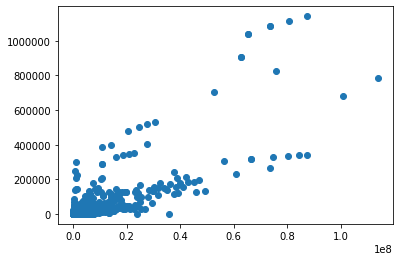

In [79]:
plt.plot(KRvideos['views'], KRvideos['comment_count'], 'o')

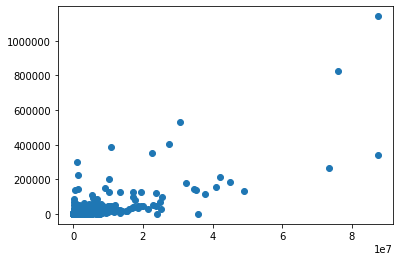

In [80]:
plt.plot(kr_drop['views'], kr_drop['comment_count'], 'o')

전체 데이터를 이용한 그래프와 100위까지의 그래프가 비슷한 모양을 띤다. 대체적으로 조회수가 높을수록 댓글수가 많은 경향이 있지만, 조회수가 높은 영상은 일반적인 영상보다 훨씬 높기 때문에 오히려 outlier처럼 보이는 경향이 있다.